<a href="https://colab.research.google.com/github/Aboubacar2012/medium_toward_ds_tools/blob/main/Approach_to_handling_the_multimodal_distributed_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Approach to handling the multimodal distributed features**

**Importing Libraries**

In [3]:
#Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from lightgbm import LGBMRegressor
from xgboost import XGBRFRegressor
from sklearn.svm import SVR
from sklearn.metrics import f1_score, confusion_matrix, classification_report

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, log_loss
from sklearn.model_selection import StratifiedKFold

from sklearn.mixture import GaussianMixture

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
sns.set_palette('muted')

**Reading the data files**

In [4]:
#Reading the data files (Change the paths if running on google colab)

train = pd.read_csv('/content/drive/MyDrive/ml_data/Multimodal distribued freatures/train.csv')
test = pd.read_csv('/content/drive/MyDrive/ml_data/Multimodal distribued freatures/test.csv')
sample = pd.read_csv('/content/drive/MyDrive/ml_data/Multimodal distribued freatures/sample_submission.csv')

**Exploring the data**

In [5]:
print(f'Shape of train data: {train.shape}')
print(f'Missing values count: {train.isna().sum().sum()}')

train.head()

Shape of train data: (300000, 26)
Missing values count: 0


id cat0 cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9     cont0     cont1  \
0   1    A    B    A    A    B    D    A    E    C    I  0.923191  0.684968   
1   2    B    A    A    A    B    B    A    E    A    F  0.437627  0.014213   
2   3    A    A    A    C    B    D    A    B    C    N  0.732209  0.760122   
3   4    A    A    A    C    B    D    A    E    G    K  0.705142  0.771678   
4   6    A    B    A    A    B    B    A    E    C    F  0.486063  0.639349   

      cont2     cont3     cont4     cont5     cont6     cont7     cont8  \
0  0.124454  0.217886  0.281421  0.881122  0.421650  0.741413  0.895799   
1  0.357438  0.846127  0.282354  0.440011  0.346230  0.278495  0.593413   
2  0.454644  0.812990  0.293756  0.914155  0.369602  0.832564  0.865620   
3  0.153735  0.732893  0.769785  0.934138  0.578930  0.407313  0.868099   
4  0.496212  0.354186  0.279105  0.382600  0.705940  0.325193  0.440967   

      cont9    cont10    cont11    cont12    cont13    target  
0  0.802461  0.724417  0.701915  0.877618  0.719903  6.994023  
1  0.546056  0.613252  0.741289  0.326679  0.808464  8.071256  
2  0.825251  0.264104  0.695561  0.869133  0.828352  5.760456  
3  0.794402  0.494269  0.698125  0.809799  0.614766  7.806457  
4  0.462146  0.724447  0.683073  0.343457  0.297743  6.868974

In [6]:
train.info()
print('\n')
train.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 26 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      300000 non-null  int64  
 1   cat0    300000 non-null  object 
 2   cat1    300000 non-null  object 
 3   cat2    300000 non-null  object 
 4   cat3    300000 non-null  object 
 5   cat4    300000 non-null  object 
 6   cat5    300000 non-null  object 
 7   cat6    300000 non-null  object 
 8   cat7    300000 non-null  object 
 9   cat8    300000 non-null  object 
 10  cat9    300000 non-null  object 
 11  cont0   300000 non-null  float64
 12  cont1   300000 non-null  float64
 13  cont2   300000 non-null  float64
 14  cont3   300000 non-null  float64
 15  cont4   300000 non-null  float64
 16  cont5   300000 non-null  float64
 17  cont6   300000 non-null  float64
 18  cont7   300000 non-null  float64
 19  cont8   300000 non-null  float64
 20  cont9   300000 non-null  float64
 21  cont10  30

id        300000
cat0           2
cat1           2
cat2           2
cat3           4
cat4           4
cat5           4
cat6           8
cat7           8
cat8           7
cat9          15
cont0     299830
cont1     299642
cont2     299707
cont3     299796
cont4     299736
cont5     299857
cont6     299875
cont7     299832
cont8     299765
cont9     299863
cont10    299894
cont11    299877
cont12    299824
cont13    299866
target    299648
dtype: int64

- Training data has 300000 records and 26 features.
- Column ‘id’ is the primary key.
- It’s a regression problem since we need to predict the ‘target’ feature which is continuous in nature.
- There are 14 numerical features which are already scaled and 10 categorical features in the data.
- There is no missing value in the data. 

In [7]:
print(f'Shape of test data: {test.shape}')
print(f'Missing values count: {test.isna().sum().sum()}')

test.head()

Shape of test data: (200000, 25)
Missing values count: 0


id cat0 cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9     cont0     cont1  \
0   0    A    B    A    C    B    D    A    E    E    G  0.331261  0.551131   
1   5    A    B    A    C    B    D    A    E    C    L  0.402404  0.617546   
2  15    A    B    A    C    B    D    A    E    C    F  0.530677  0.618126   
3  16    A    A    B    A    B    D    A    E    E    F  0.439653  0.487403   
4  17    A    B    A    A    B    B    A    E    E    I  0.389844  0.752760   

      cont2     cont3     cont4     cont5     cont6     cont7     cont8  \
0  0.486284  0.156058  0.701679  0.595507  0.286912  0.279884  0.202234   
1  0.296852  0.187440  0.277480  0.479552  0.397436  0.476742  0.857073   
2  0.760865  0.199872  0.279508  0.676395  0.695284  0.253316  0.586934   
3  0.715786  0.192808  0.479503  0.759875  0.240049  0.298074  0.442475   
4  0.315269  0.191734  0.757845  0.210232  0.329851  0.616663  0.170475   

      cont9    cont10    cont11    cont12    cont13  
0  0.242654  0.285147  0.264308  0.653654  0.302448  
1  0.516393  0.562065  0.730542  0.318492  0.736251  
2  0.548555  0.836193  0.759788  0.333572  0.273905  
3  0.596746  0.414131  0.255382  0.589080  0.311625  
4  0.263235  0.710961  0.224045  0.285860  0.794931

In [8]:
test.info()
print('\n')
test.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      200000 non-null  int64  
 1   cat0    200000 non-null  object 
 2   cat1    200000 non-null  object 
 3   cat2    200000 non-null  object 
 4   cat3    200000 non-null  object 
 5   cat4    200000 non-null  object 
 6   cat5    200000 non-null  object 
 7   cat6    200000 non-null  object 
 8   cat7    200000 non-null  object 
 9   cat8    200000 non-null  object 
 10  cat9    200000 non-null  object 
 11  cont0   200000 non-null  float64
 12  cont1   200000 non-null  float64
 13  cont2   200000 non-null  float64
 14  cont3   200000 non-null  float64
 15  cont4   200000 non-null  float64
 16  cont5   200000 non-null  float64
 17  cont6   200000 non-null  float64
 18  cont7   200000 non-null  float64
 19  cont8   200000 non-null  float64
 20  cont9   200000 non-null  float64
 21  cont10  20

id        200000
cat0           2
cat1           2
cat2           2
cat3           4
cat4           4
cat5           4
cat6           7
cat7           8
cat8           7
cat9          15
cont0     199937
cont1     199835
cont2     199875
cont3     199902
cont4     199903
cont5     199929
cont6     199927
cont7     199926
cont8     199915
cont9     199944
cont10    199948
cont11    199946
cont12    199916
cont13    199949
dtype: int64

- Test data has 200000 records and 25 features. ‘Target’ feature is absent as expected.
- Column ‘id’ is the primary key.
- There are 14 numerical features which are already scaled and 10 categorical features in the data.
- There is no missing value in the data.

In [9]:
sample.head()

id  target
0   0     0.5
1   5     0.5
2  15     0.5
3  16     0.5
4  17     0.5

- We need to submit the predicted target value for each id in the test data.

**Exploratory Data Analysis (EDA)**


In [10]:
train = train.set_index('id')
test = test.set_index('id')
#Checking if there is any difference between the behaviour of train and test data
train.describe() - test.describe()


cont0          cont1         cont10         cont11  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       -0.000010       0.001024      -0.000752       0.000816   
std         0.000236       0.000214      -0.000637       0.000282   
min        -0.002146      -0.007083      -0.002097      -0.006230   
25%        -0.000031       0.000389       0.000589      -0.000354   
50%        -0.000418       0.000270      -0.002932       0.002891   
75%         0.000169       0.001184      -0.001772       0.000518   
max         0.005460       0.006036      -0.002213      -0.001059   

              cont12         cont13          cont2          cont3  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.000646      -0.000344       0.000771       0.000516   
std         0.000314      -0.000029       0.000412      -0.000052   
min        -0.018498       0.001890      -0.004274      -0.001102   
25%        -0.000148       0.000081       0.000439       0.000204   
50%         0.002404      -0.003328       0.000383       0.000895   
75%         0.001666      -0.000118       0.000989       0.000338   
max        -0.005017      -0.006176      -0.003849       0.002494   

               cont4          cont5          cont6          cont7  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.000518      -0.000424       0.000116       0.000139   
std         0.000486      -0.000083       0.000058       0.000152   
min        -0.000793      -0.029309       0.006910      -0.001825   
25%         0.000002      -0.000998      -0.000404       0.000091   
50%         0.000053      -0.000119       0.000041      -0.000186   
75%         0.006372      -0.000938       0.000738      -0.000253   
max         0.012543       0.002837       0.003797      -0.010601   

               cont8          cont9  target  
count  100000.000000  100000.000000     NaN  
mean        0.000191      -0.000057     NaN  
std        -0.000201       0.000311     NaN  
min         0.003285      -0.009620     NaN  
25%        -0.000049       0.000062     NaN  
50%         0.000240       0.000951     NaN  
75%         0.000286       0.000691     NaN  
max        -0.000168       0.010211     NaN

There is not a major difference in the distribution of all features among test and train data. This is a good sign and will help us in a correct validation.



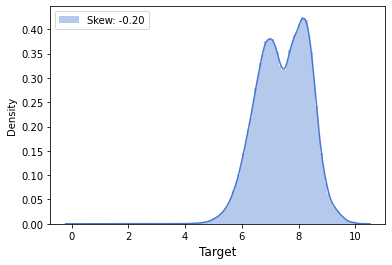

In [11]:
num_columns = train.select_dtypes(exclude=['object']).columns
num_columns = [i for i in num_columns if i != 'target']

cat_columns = train.select_dtypes(include=['object']).columns
#Let's check the distribution of target variable

sns.distplot(train['target'], kde=True, bins=120, label="Skew: %.2f"%(train['target'].skew()))
plt.xlabel('Target', fontsize=12); plt.legend()


The distribution of the target variable is bimodal.

**Continuous Features**

<Figure size 432x288 with 0 Axes>

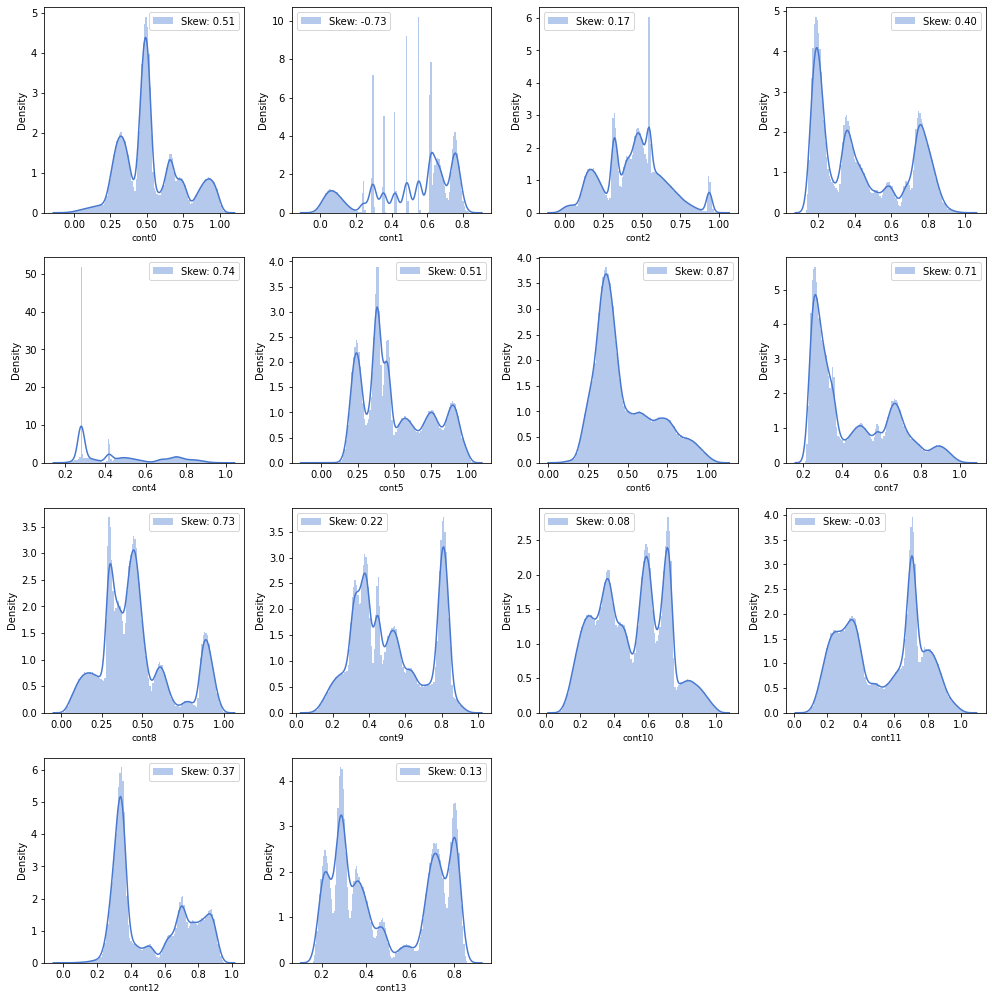

In [12]:
i = 1
plt.figure()
fig, ax = plt.subplots(4, 4, figsize=(14, 14))

for feature in num_columns:
    plt.subplot(4, 4, i)
    sns.distplot(train[feature], kde=True, bins=120, label="Skew: %.2f"%(train[feature].skew()))
    plt.xlabel(feature, fontsize=9); plt.legend(loc="best")
    i += 1

fig.tight_layout()

fig.delaxes(ax[3,2])
fig.delaxes(ax[3,3])

plt.show()

- No feature is highly skewed.
- All continuous features are multimodal in nature.

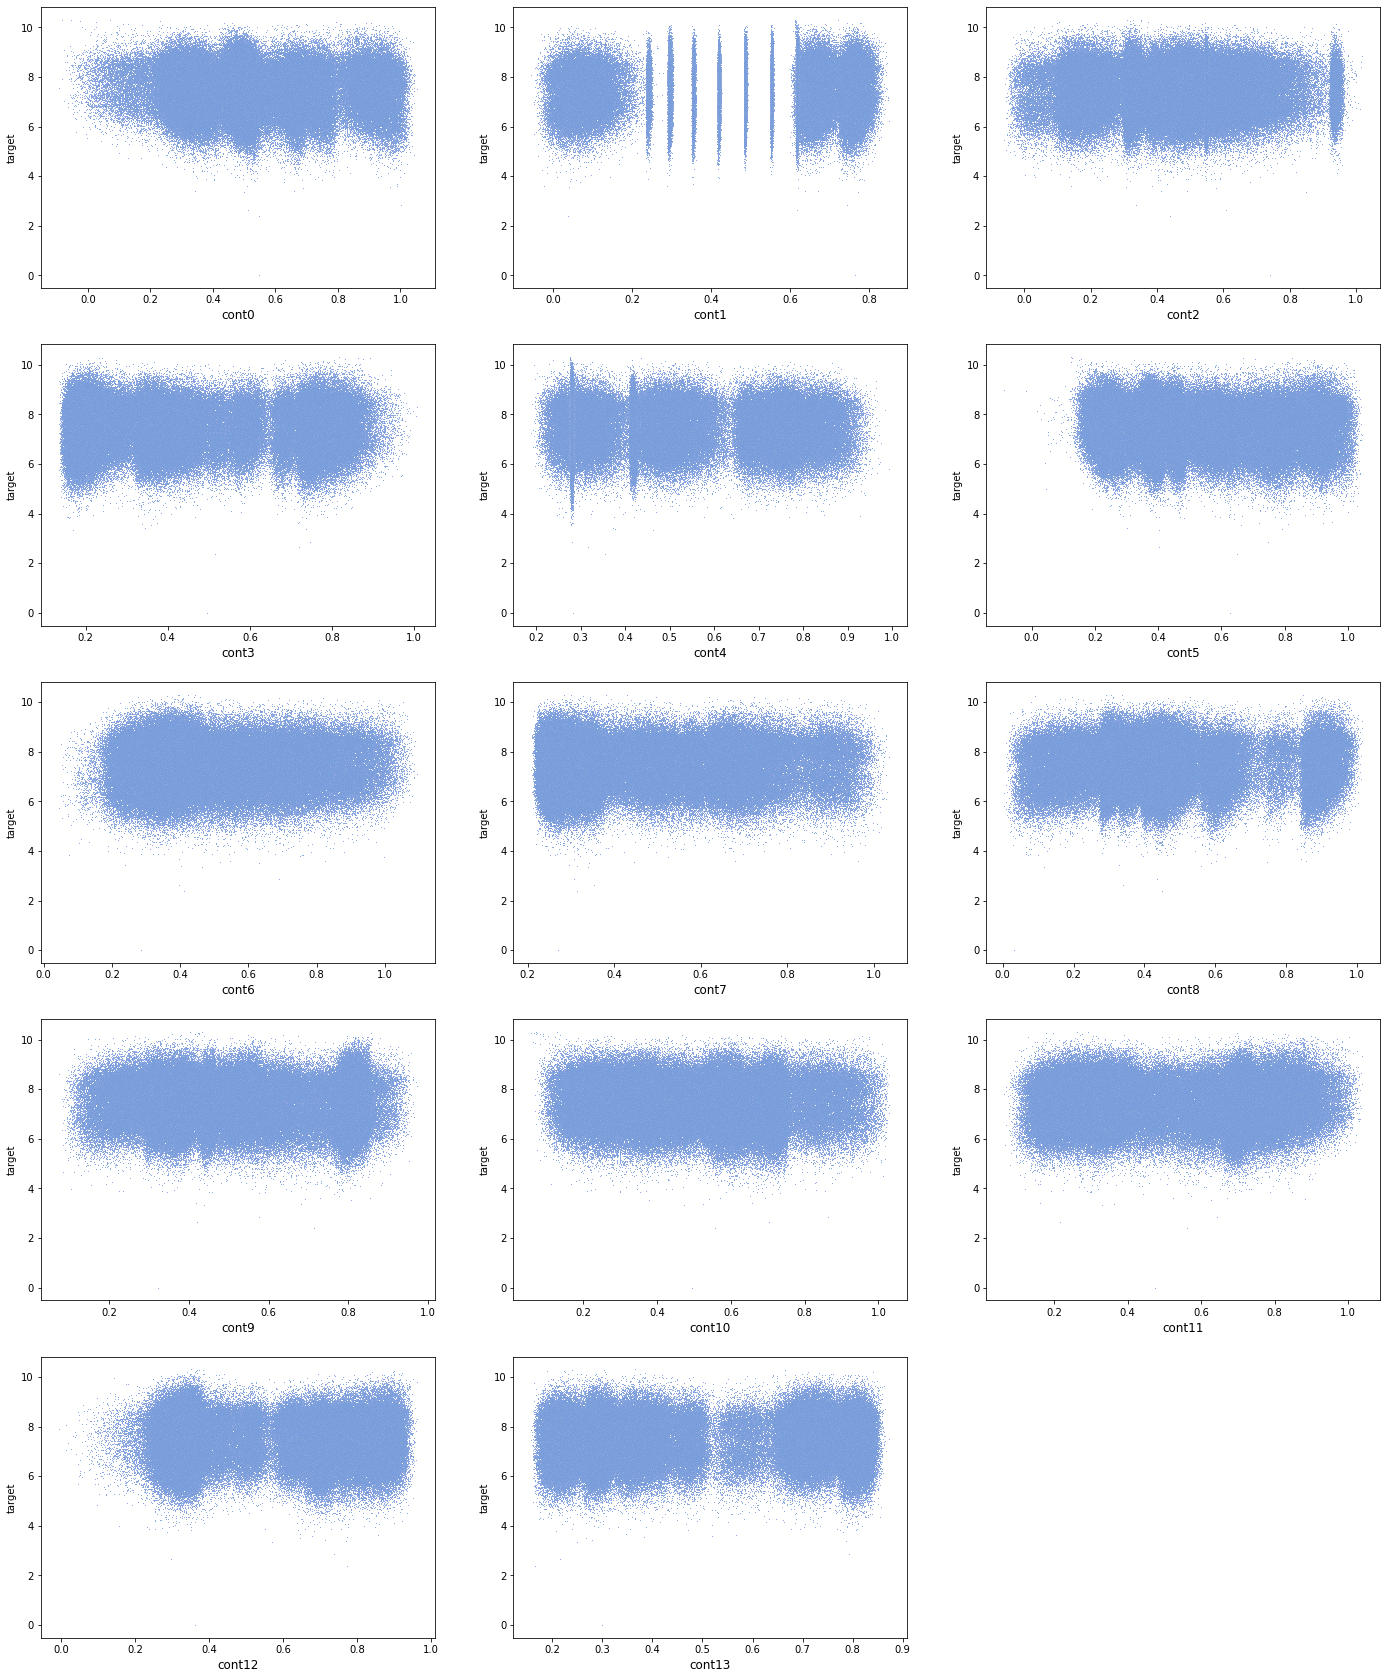

In [13]:
#Scatterplot for continuous features
fig, ax = plt.subplots(5, 3, figsize=(24, 30))
for i, feature in enumerate(num_columns):
    plt.subplot(5, 3, i+1)
    sns.scatterplot(x=feature, 
                    y="target", 
                    data=train, s = 1)
    plt.xlabel(feature, fontsize=12)

fig.delaxes(ax[4,2])
plt.show()

- We can observe some clusters in these scatter plots.
- Cont1 feature has some clearly defined clusters.
- We should try the clustering approach in the feature engineering section.

**Categorical Features**

In [14]:
train.head()

cat0 cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9     cont0     cont1  \
id                                                                         
1     A    B    A    A    B    D    A    E    C    I  0.923191  0.684968   
2     B    A    A    A    B    B    A    E    A    F  0.437627  0.014213   
3     A    A    A    C    B    D    A    B    C    N  0.732209  0.760122   
4     A    A    A    C    B    D    A    E    G    K  0.705142  0.771678   
6     A    B    A    A    B    B    A    E    C    F  0.486063  0.639349   

       cont2     cont3     cont4     cont5     cont6     cont7     cont8  \
id                                                                         
1   0.124454  0.217886  0.281421  0.881122  0.421650  0.741413  0.895799   
2   0.357438  0.846127  0.282354  0.440011  0.346230  0.278495  0.593413   
3   0.454644  0.812990  0.293756  0.914155  0.369602  0.832564  0.865620   
4   0.153735  0.732893  0.769785  0.934138  0.578930  0.407313  0.868099   
6   0.496212  0.354186  0.279105  0.382600  0.705940  0.325193  0.440967   

       cont9    cont10    cont11    cont12    cont13    target  
id                                                              
1   0.802461  0.724417  0.701915  0.877618  0.719903  6.994023  
2   0.546056  0.613252  0.741289  0.326679  0.808464  8.071256  
3   0.825251  0.264104  0.695561  0.869133  0.828352  5.760456  
4   0.794402  0.494269  0.698125  0.809799  0.614766  7.806457  
6   0.462146  0.724447  0.683073  0.343457  0.297743  6.868974

<Figure size 432x288 with 0 Axes>

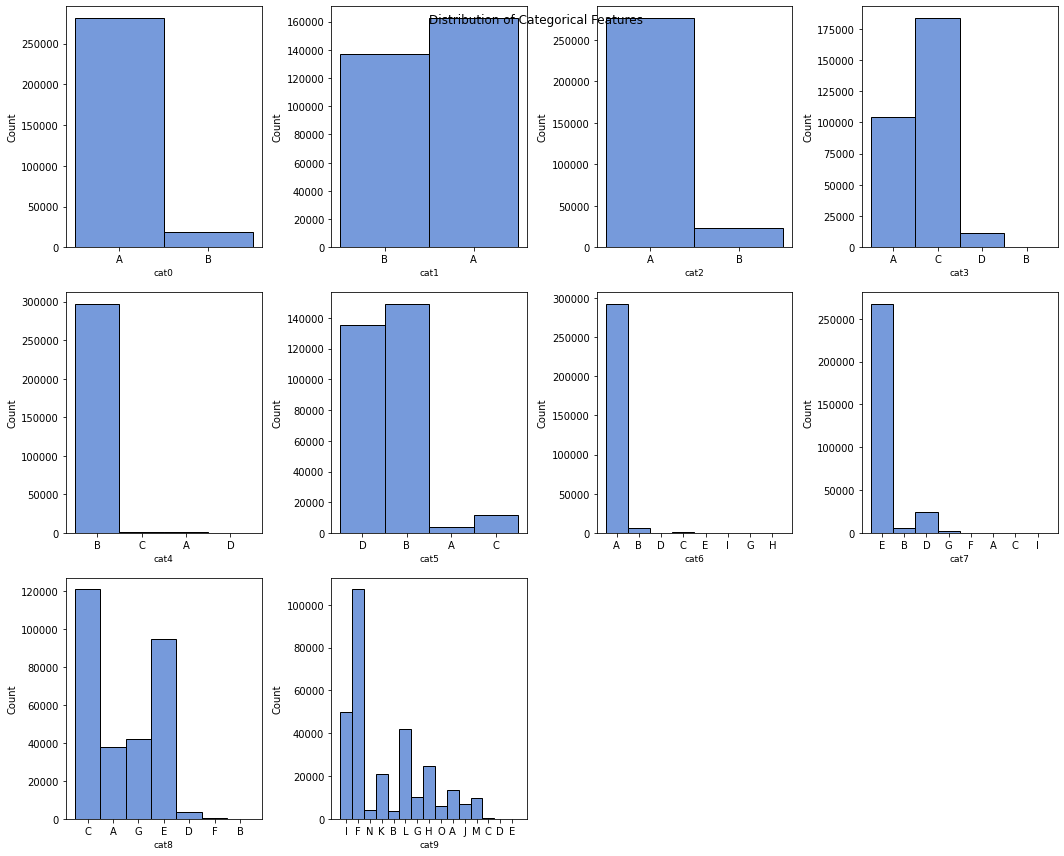

In [15]:
# Checking the distribution of categorical features

i = 1
plt.figure()
fig, ax = plt.subplots(3, 4, figsize=(15,12))

for feature in cat_columns:
    plt.subplot(3, 4, i)
    sns.histplot(x=feature, data=train)
    plt.xlabel(feature, fontsize = 9)
    i += 1

fig.suptitle('Distribution of Categorical Features')
plt.tight_layout()

fig.delaxes(ax[2,2])
fig.delaxes(ax[2,3])

plt.show()

We can observe that some categories are much dominating than others. Such features are not useful for the models.

**Scaling**

All continuous features are already scaled in the dataset.

**Correlation Check**

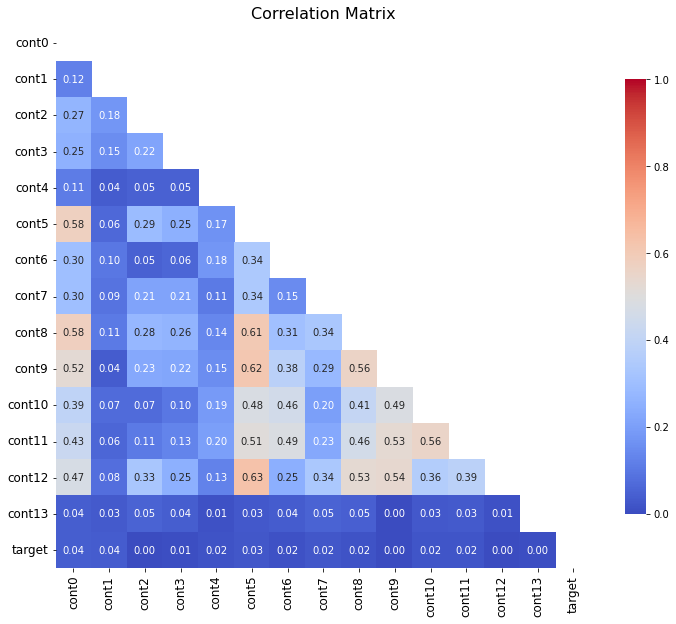

In [16]:
#Let's check how the features are inter-related to each other and with target variable
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 10))
ax.set_title("Correlation Matrix", fontsize=16)

corr = train[num_columns + ['target']].corr().abs()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
            cbar_kws={"shrink": .8}, vmin=0, vmax=1)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    tick.label.set_rotation(90) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)
    tick.label.set_rotation(0)
    
plt.show()

- None of the features are highly correlated with each other.
- None of the features are directly correlated with the target feature.

**Outlier Treatment**

In [17]:
#Checking for mild outliers
Q1_train = train.quantile(0.25)
Q3_train = train.quantile(0.75)
IQR_train = Q3_train - Q1_train

((train < Q1_train - 1.5*IQR_train) | (train > Q3_train + 1.5*IQR_train)).agg([sum, 'mean', 'count'])

cat0      cat1      cat2      cat3      cat4      cat5      cat6  \
sum         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
mean        0.0       0.0       0.0       0.0       0.0       0.0       0.0   
count  300000.0  300000.0  300000.0  300000.0  300000.0  300000.0  300000.0   

           cat7      cat8      cat9          cont0     cont1    cont10  \
sum         0.0       0.0       0.0      17.000000       0.0       0.0   
mean        0.0       0.0       0.0       0.000057       0.0       0.0   
count  300000.0  300000.0  300000.0  300000.000000  300000.0  300000.0   

         cont11    cont12    cont13          cont2     cont3     cont4  \
sum         0.0       0.0       0.0    8777.000000       0.0       0.0   
mean        0.0       0.0       0.0       0.029257       0.0       0.0   
count  300000.0  300000.0  300000.0  300000.000000  300000.0  300000.0   

          cont5         cont6     cont7          cont8     cont9  \
sum         0.0    1407.00000       0.0   22373.000000       0.0   
mean        0.0       0.00469       0.0       0.074577       0.0   
count  300000.0  300000.00000  300000.0  300000.000000  300000.0   

              target  
sum       359.000000  
mean        0.001197  
count  300000.000000

In [18]:
#Checking for extreme outliers
Q1_train = train.quantile(0.25)
Q3_train = train.quantile(0.75)
IQR_train = Q3_train - Q1_train

((train < Q1_train - 3*IQR_train) | (train > Q3_train + 3*IQR_train)).agg([sum, 'mean', 'count'])

cat0      cat1      cat2      cat3      cat4      cat5      cat6  \
sum         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
mean        0.0       0.0       0.0       0.0       0.0       0.0       0.0   
count  300000.0  300000.0  300000.0  300000.0  300000.0  300000.0  300000.0   

           cat7      cat8      cat9     cont0     cont1    cont10    cont11  \
sum         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
mean        0.0       0.0       0.0       0.0       0.0       0.0       0.0   
count  300000.0  300000.0  300000.0  300000.0  300000.0  300000.0  300000.0   

         cont12    cont13     cont2     cont3     cont4     cont5     cont6  \
sum         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
mean        0.0       0.0       0.0       0.0       0.0       0.0       0.0   
count  300000.0  300000.0  300000.0  300000.0  300000.0  300000.0  300000.0   

          cont7     cont8     cont9        target  
sum         0.0       0.0       0.0       3.00000  
mean        0.0       0.0       0.0       0.00001  
count  300000.0  300000.0  300000.0  300000.00000

The Target Feature has some extreme outliers but there is no significant outlier in other features.

Let’s remove the records having target feature outliers and replace the mild outliers in other features with median values.



In [19]:
# Removing records with extreme outliers in target variable
train = train.drop(train[(train['target'] < (Q1_train - 3*IQR_train)['target']) | (train['target'] > (Q1_train + 3*IQR_train)['target'])].index)

Removed 3 records.

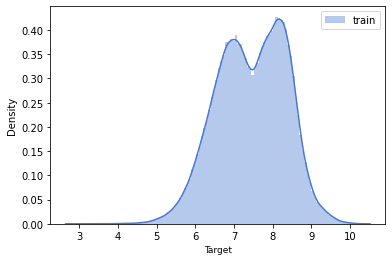

In [20]:
train_num = train.select_dtypes(exclude=['object'])
#Replacing outliers with median value

def replace_outliers(data):
    for col in data.columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        median_ = data[col].median()
      
        data.loc[((data[col] < Q1 - 1.5*IQR) | (data[col] > Q3 + 1.5*IQR)), col] = median_
    return data

train[train_num.drop('target', axis = 1).columns] = replace_outliers(train_num.drop('target', axis = 1))
#Checking the distribution of target variable again
sns.distplot(train['target'], kde=True, bins=120, label='train')
plt.xlabel('Target', fontsize=9); plt.legend()

**Feature Engineering**

**Continuous Features**

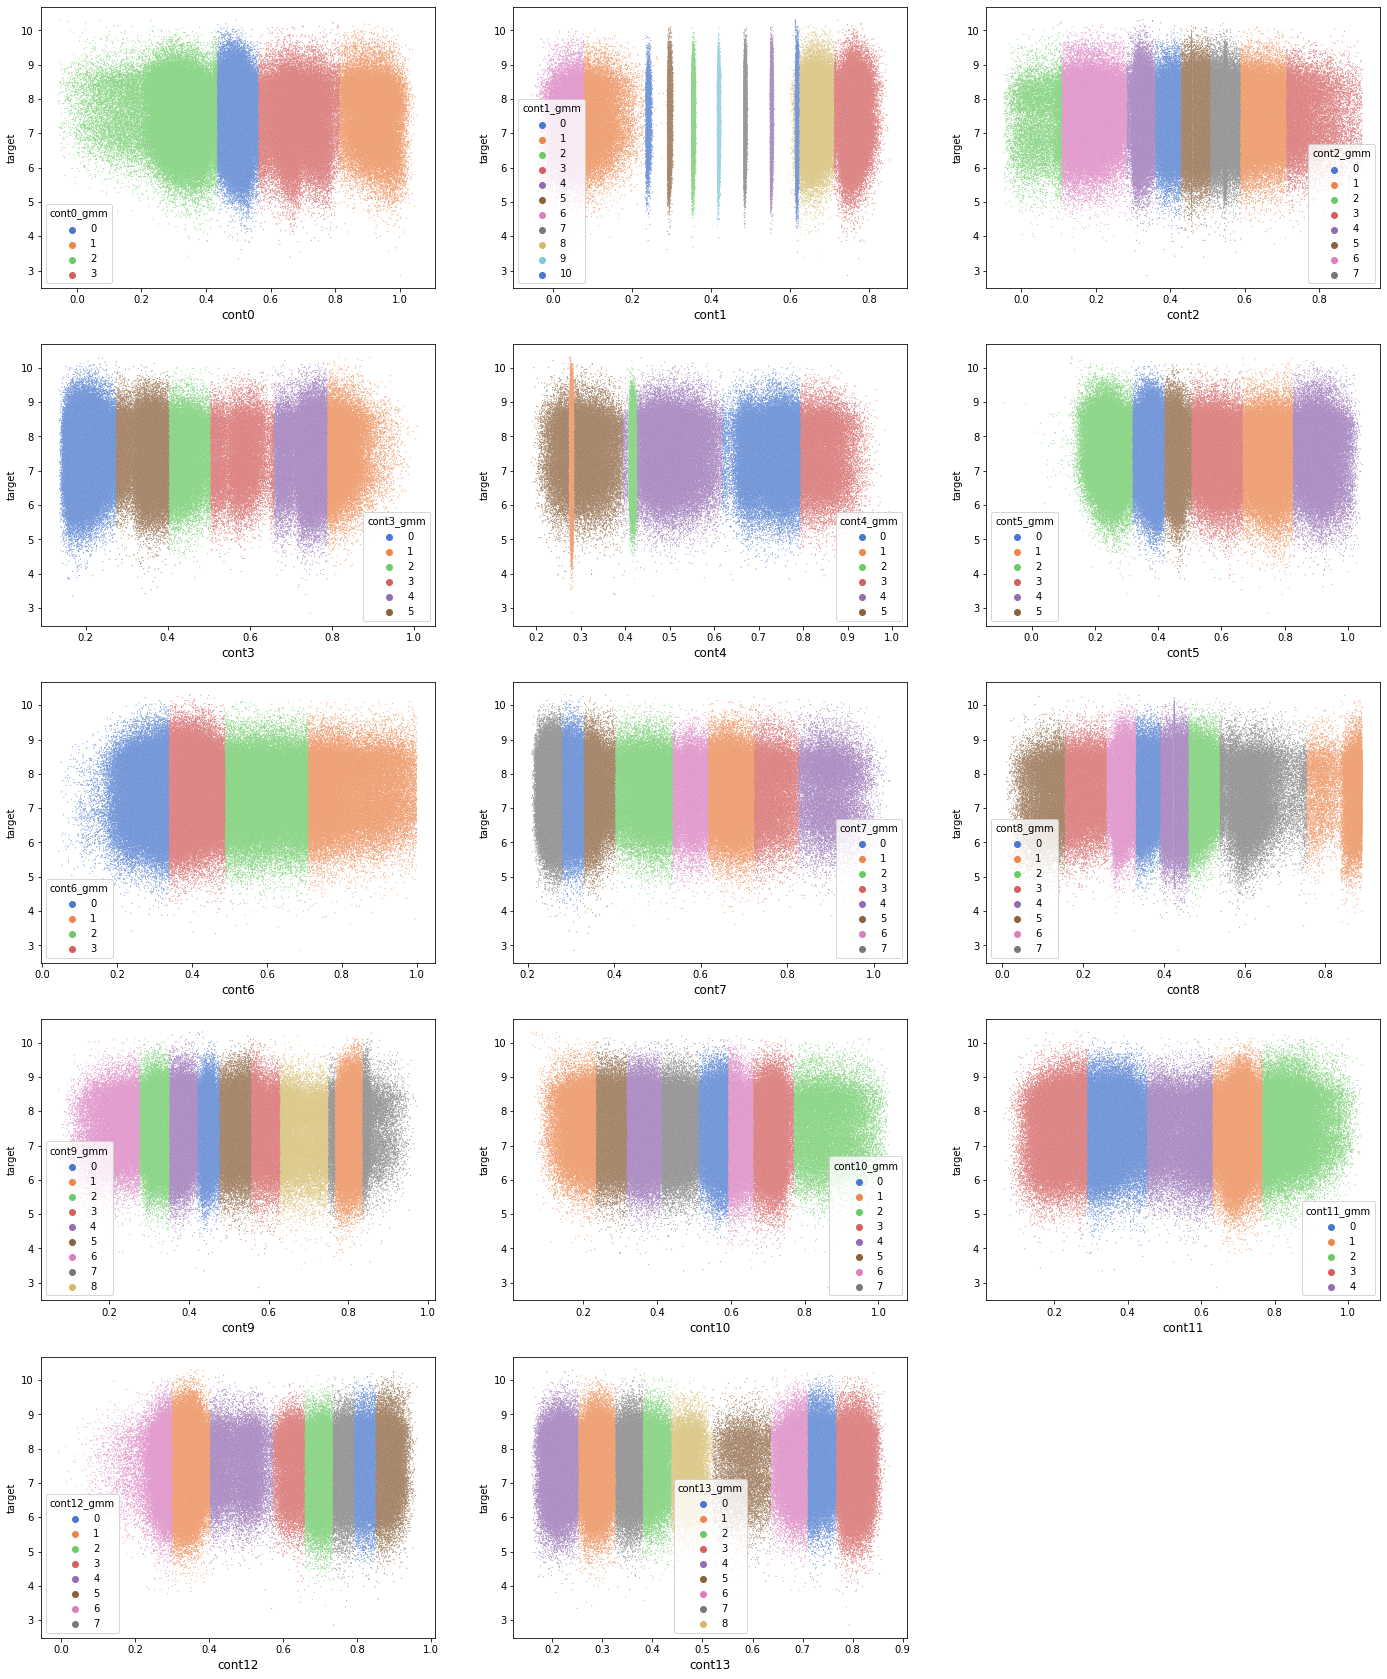

In [21]:
#Defining number of bins based on above scatterplot and using Gaussian Mixture Model to cluster the data

inits = [4,11,8,6,6,6,4,8,8,9,8,5,8,9]
gmms = []
for feature, init in zip(num_columns, inits):
    X_ = np.array(train[feature].tolist()).reshape(-1, 1)
    gmm_ = GaussianMixture(n_components=init).fit(X_)
    gmms.append(gmm_)
    preds = gmm_.predict(X_)
    train[f'{feature}_gmm'] = preds
    train[f'{feature}_gmm'] = preds[:len(train)]
    test[f'{feature}_gmm'] = preds[:len(test)]
#Plotting scatterplot with clusters

fig, ax = plt.subplots(5, 3, figsize=(24, 30))
for i, feature in enumerate(num_columns):
    plt.subplot(5, 3, i+1)
    sns.scatterplot(x=feature, 
                    y="target", 
                    data=train, 
                    hue=f'{feature}_gmm', s = 1, palette='muted')
    
    plt.xlabel(feature, fontsize=12)
    
fig.delaxes(ax[4,2])
plt.show()

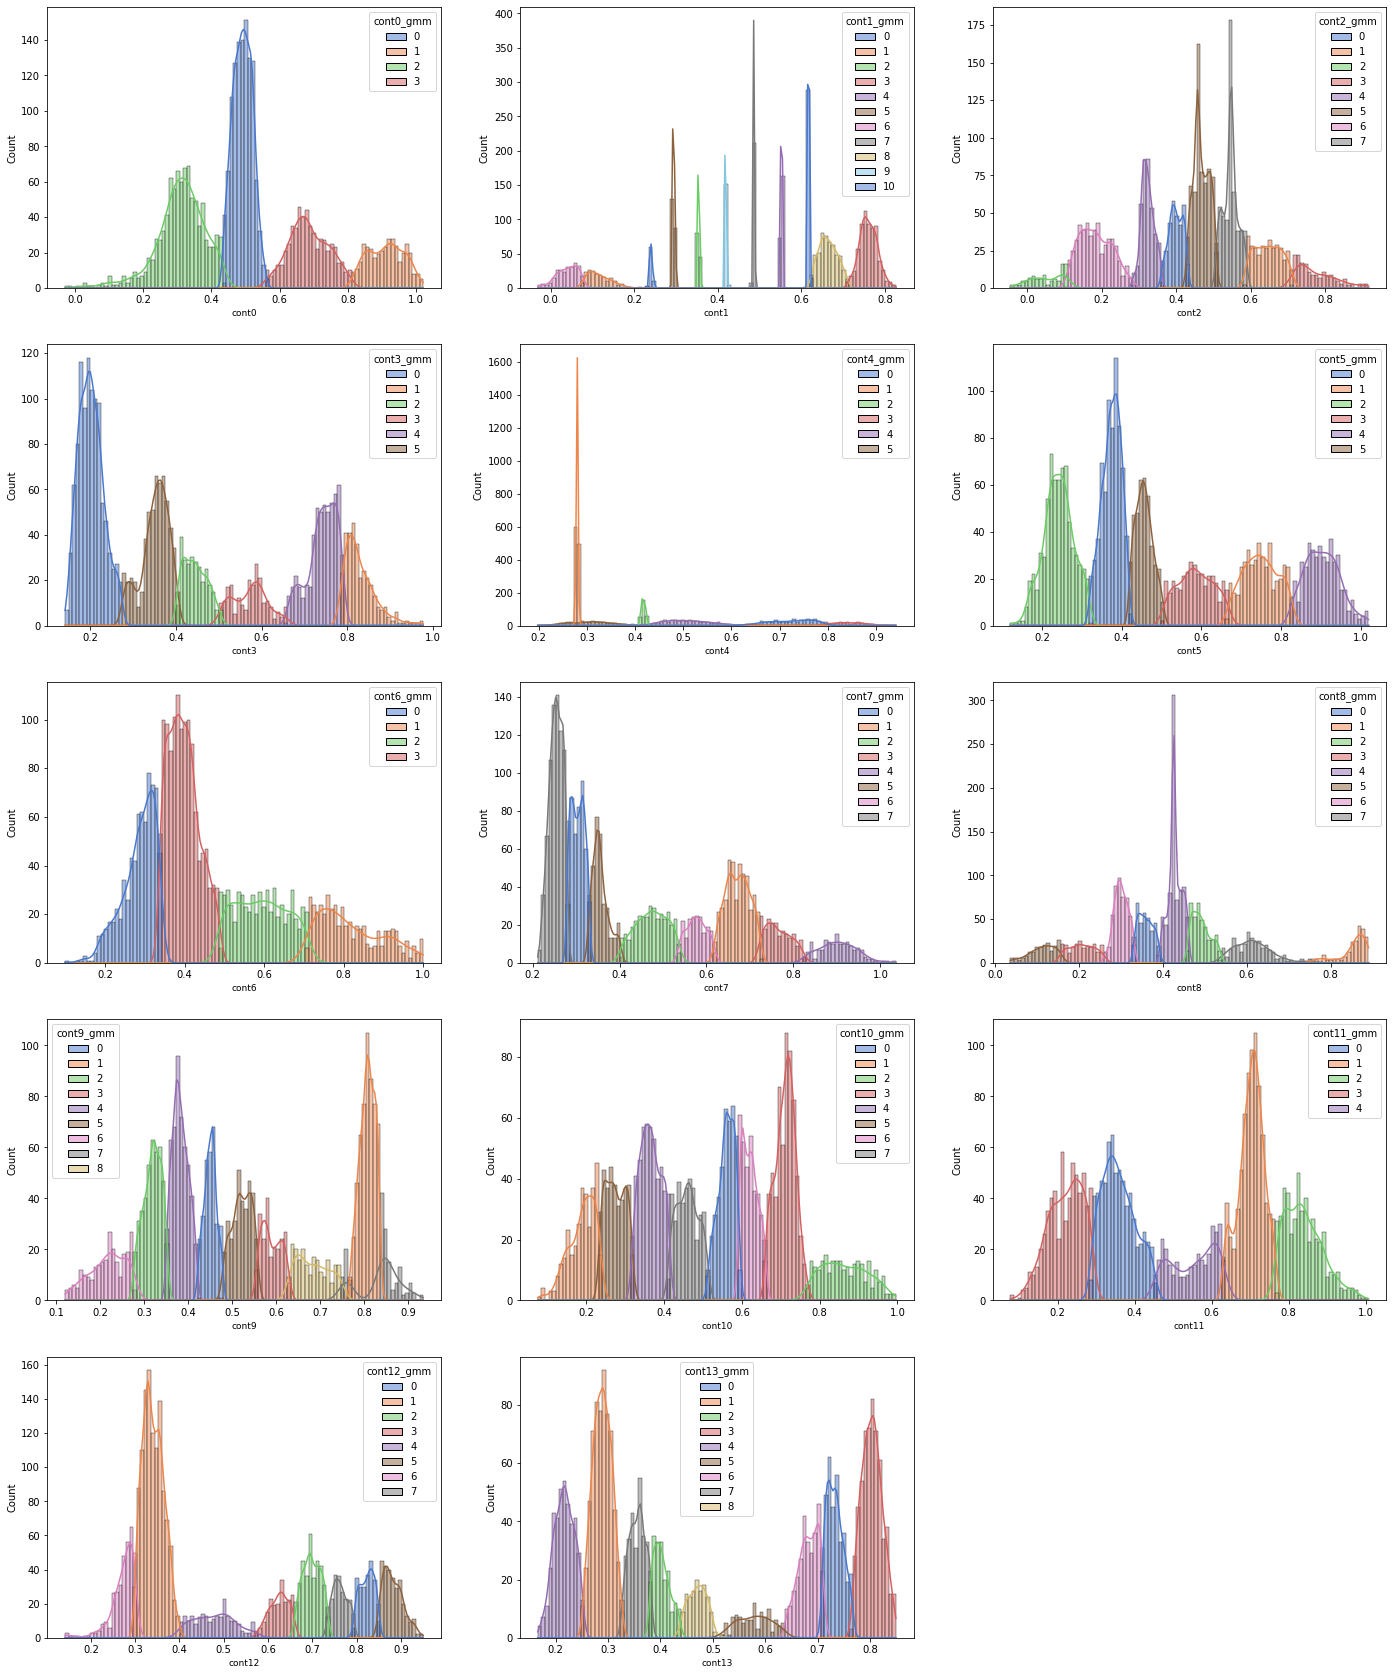

In [22]:
#Let's plot the histograms as well with the clusters
fig, ax = plt.subplots(5, 3, figsize=(24, 30))
for i, feature in enumerate(num_columns):
    plt.subplot(5, 3, i+1)
    sns.histplot(x=feature, 
                 data=train[::100], 
                 hue=f'{feature}_gmm', 
                 kde=True, 
                 bins=100, 
                 palette='muted')
    plt.xlabel(feature, fontsize=9)
    
fig.delaxes(ax[4,2])
plt.show()

- We can see how well the gaussian mixture model has worked in identifying these clusters. This should really help our models to score well on this data.


**Categorical Features**

In [24]:
#Applying label encoding on the categorical features
from sklearn.preprocessing import LabelEncoder
for feature in cat_columns:
    le = LabelEncoder()
    le.fit(train[feature])
    train[feature] = le.transform(train[feature])
    test[feature] = le.transform(test[feature])

**Modeling**

Let’s try different ML models and see which performs best.

In [25]:
train = train.reset_index(drop = True)
#Separating the target variable and removing the 'id' column
y = train['target']
X = train.drop(['target'], axis = 1)
# Splitting the train data in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
model_names = ["Linear",  "Lasso", "Ridge", "Decision Tree", "LGBM", "Random Forest", "XGBoost"]

models = [
    LinearRegression(fit_intercept=True),
    Lasso(fit_intercept=True),
    Ridge(fit_intercept=True),
    DecisionTreeRegressor(),
    LGBMRegressor(),
    RandomForestRegressor(n_estimators = 10, max_depth = 50),
    XGBRFRegressor()]

for name, model in zip(model_names, models):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = mean_squared_error(y_test, y_pred, squared=False)
    print(f'{name}: RMSE: {score}')

Linear: RMSE: 0.8699758583151025
Lasso: RMSE: 0.8889082968790681
Ridge: RMSE: 0.8699758186451649
Decision Tree: RMSE: 1.2310640417526948
LGBM: RMSE: 0.8483140526428191
Random Forest: RMSE: 0.9010025780942591
[14:19:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost: RMSE: 0.8746741718286518


Best performing model: LightGBM. It is fitting this data much better than other models. Let’s try submitting this model on test data.

In [27]:
X_train.columns.symmetric_difference(test.columns)
#Index([], dtype='object')
train.shape, test.shape
((299997, 39), (200000, 38))
test = test.reset_index(drop = True)
model = LGBMRegressor()
model.fit(X_train, y_train)
sample['target'] = model.predict(test.drop('id', axis = 1, errors = 'ignore'))
sample.to_csv('lgbm.csv', index = False)

Great! We have got a leaderboard RMSE score of 0.85081.

Since the LGBM model is showing good potential, let’s dive deep into the hyperparameter tuning of this best model.

**LGBM Hyperparameter Tuning using Optuna**

In [30]:
## Install optuna library
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 308 kB 25.4 MB/s 
     |████████████████████████████████| 81 kB 11.3 MB/s 
     |████████████████████████████████| 209 kB 66.8 MB/s 
     |████████████████████████████████| 78 kB 6.8 MB/s 
     |████████████████████████████████| 146 kB 72.1 MB/s 
     |████████████████████████████████| 49 kB 5.7 MB/s 
     |████████████████████████████████| 112 kB 70.2 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=dc7d4e6093032c65494e3547ea86525c56ae66f1cb200b13d7a89675a8653c88
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [31]:
#Importing optuna library
import optuna
#Function for hyperparameter tuning using optuna

def objective(trial,data=X,target=y):
    
    train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.2,random_state=42)
    param = {
        'metric': 'rmse', 
        'random_state': 48,
        'n_estimators': 2000,
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.006,0.008,0.01,0.014,0.017,0.02]),
        'max_depth': trial.suggest_categorical('max_depth', [10,20,100]),
        'num_leaves' : trial.suggest_int('num_leaves', 1, 1000),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 300),
        'cat_smooth' : trial.suggest_int('min_data_per_groups', 1, 100)
    }
    model = LGBMRegressor(**param)  
    model.fit(train_x,train_y,eval_set=[(test_x,test_y)],early_stopping_rounds=100,verbose=False)
    preds = model.predict(test_x)
    
    rmse = mean_squared_error(test_y, preds,squared=False)
    
    return rmse

In [32]:
#Hyperparameter tuning to minimize the RMSE for predictions

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2022-06-02 14:41:16,775] A new study created in memory with name: no-name-ac714bac-f6e6-4e36-921a-f0e1767744c1
[I 2022-06-02 14:43:15,705] Trial 0 finished with value: 0.8457066421591365 and parameters: {'reg_alpha': 0.0013763076158032714, 'reg_lambda': 2.4229468445808644, 'colsample_bytree': 0.5, 'subsample': 1.0, 'learning_rate': 0.01, 'max_depth': 10, 'num_leaves': 327, 'min_child_samples': 133, 'min_data_per_groups': 3}. Best is trial 0 with value: 0.8457066421591365.
[I 2022-06-02 14:45:09,607] Trial 1 finished with value: 0.8456134126537729 and parameters: {'reg_alpha': 0.0361049472289946, 'reg_lambda': 3.791261548673659, 'colsample_bytree': 0.5, 'subsample': 0.8, 'learning_rate': 0.01, 'max_depth': 10, 'num_leaves': 104, 'min_child_samples': 103, 'min_data_per_groups': 1}. Best is trial 1 with value: 0.8456134126537729.
[I 2022-06-02 14:46:46,109] Trial 2 finished with value: 0.8469682689890999 and parameters: {'reg_alpha': 0.011673265135328369, 'reg_lambda': 0.01152443848100

Number of finished trials: 10
Best trial: {'reg_alpha': 0.06795143393690971, 'reg_lambda': 0.38929816880703566, 'colsample_bytree': 0.3, 'subsample': 0.7, 'learning_rate': 0.01, 'max_depth': 10, 'num_leaves': 627, 'min_child_samples': 283, 'min_data_per_groups': 36}


In [33]:
#Checking the best set of hyperparameters

print(f"\tBest value (rmse): {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

	Best value (rmse): 0.84491
	Best params:
		reg_alpha: 0.06795143393690971
		reg_lambda: 0.38929816880703566
		colsample_bytree: 0.3
		subsample: 0.7
		learning_rate: 0.01
		max_depth: 10
		num_leaves: 627
		min_child_samples: 283
		min_data_per_groups: 36


In [34]:
#Adding some additional parameters

params=study.best_params   
params['random_state'] = 48
params['n_estimators'] = 2000
params['metric'] = 'rmse'

In [35]:
#Training LGBM with best set of hyperparameters

model = LGBMRegressor(**params)
model.fit(X, y)
sample['target'] = model.predict(test.drop('id', axis = 1, errors = 'ignore'))
sample.to_csv('submission.csv', index = False)